In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import csv

pathBoth = '/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/template/temp01.bmp'
pathFull = '/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/source_data/source1_003.bmp'

def func(both_img, full_img):
    img_rgb = cv2.imread(full_img, 0)
    template = cv2.imread(both_img, 0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
    x_min = np.unravel_index(res.argmax(), res.shape)[1]
    y_min = np.unravel_index(res.argmax(), res.shape)[0]
    x_max = x_min + w 
    y_max = y_min + h
    
    #plt.show(cv2.rectangle(img_rgb, (w)))
    return [full_img, 1920, 1080, 'wings', x_min, y_min, x_max, y_max]


print(func(pathBoth, pathFull))

['/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/source_data/source1_003.bmp', 1920, 1080, 'wings', 1200, 540, 1700, 850]


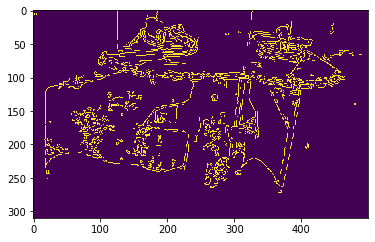

In [5]:
import cv2

# load the image image, convert it to grayscale, and detect edges
template = cv2.imread(pathBoth)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 250)
(tH, tW) = template.shape[:2]
#cv2.imshow("Template", template)
plt.imshow(template)

In [3]:
!pip install opencv-python

     |████████████████████████████████| 47.9MB 1.3MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


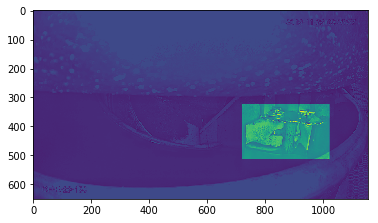

In [8]:
# import the necessary packages
import numpy as np
import argparse
import imutils
import cv2


# load the puzzle and waldo images
puzzle = cv2.imread(pathFull, 0)
waldo = cv2.imread(pathBoth, 0)

(waldoHeight, waldoWidth) = waldo.shape[:2]

# find the waldo in the puzzle
result = cv2.matchTemplate(puzzle, waldo, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(result)

# grab the bounding box of waldo and extract him from
# the puzzle image
topLeft = maxLoc
botRight = (topLeft[0] + waldoWidth, topLeft[1] + waldoHeight)
roi = puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]

# construct a darkened transparent 'layer' to darken everything
# in the puzzle except for waldo
mask = np.zeros(puzzle.shape, dtype = "uint8")
puzzle = cv2.addWeighted(puzzle, 0.25, mask, 0.75, 0)

# put the original waldo back in the image so that he is
# 'brighter' than the rest of the image
puzzle[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi

# display the images
plt.imshow(imutils.resize(puzzle, height = 650))
#plt.imshow("Waldo", waldo)
#cv2.waitKey(0)

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os 

pathBoth = '/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/template/temp01.bmp'
pathFull = '/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/source_data/source1_003.bmp'

all_files = '/Users/vakurin/Documents/Study/Code/TF2/comtech/dataset/source_data/' 
all = os.listdir(all_files)

for i in range(0, len(all), 30):
    print(all[i])
    

    img_rgb = cv2.imread(all_files + all[i])
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(pathBoth, 0)
    w, h = template.shape[::-1]

    
    res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    print(min_val, max_val, min_loc, max_loc)
    threshold = 0.6
    loc = np.where( res >= threshold)
    print(loc)
    
#     for pt in zip(*loc[::-1]):
#         cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

#     cv2.imwrite('output/{}.png'.format(all[i]), img_rgb)


source3_188.bmp
174150912.0 1553319424.0 (227, 388) (172, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source1_107.bmp
116280832.0 1490756608.0 (112, 657) (436, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source3_015.bmp
166190848.0 1553538048.0 (561, 476) (177, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source1_048.bmp
100065024.0 1487393792.0 (1200, 540) (475, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source3_164.bmp
166187776.0 1553334784.0 (219, 398) (177, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source3_211.bmp
178846720.0 1553182208.0 (227, 387) (172, 0)
(array([  0,   0,   0, ..., 770, 770, 770]), array([   0,    1,    2, ..., 1418, 1419, 1420]))
source3_262.bmp
176688640.0 1553304064.0 (454, 471) (177, 0)
(a